In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
SEED: int = 42
NUMBER_OF_INSTANCES: int = 100
SPREAD: float = 2.0
OFFSET: float = 4.0
GAIN: float = 3.0

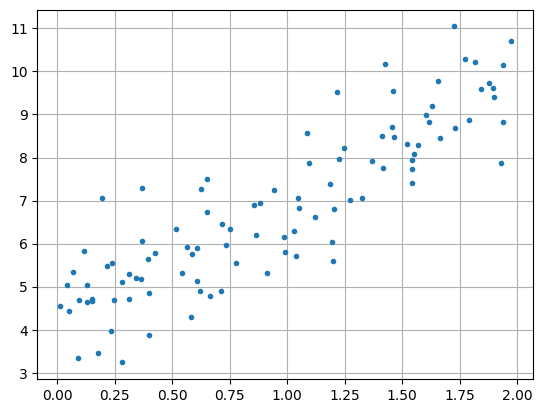

In [3]:
np.random.seed(SEED)
x: np.array = SPREAD * np.random.rand(NUMBER_OF_INSTANCES, 1)
y: np.array = OFFSET + GAIN * x + np.random.randn(NUMBER_OF_INSTANCES, 1)

plt.plot(x, y, '.')
plt.grid(True)
plt.show()

In [4]:
x_b = add_dummy_feature(x)
theta_best = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y
print(theta_best)

[[4.21509616]
 [2.77011339]]


In [5]:
x_new: np.array = np.array([[0], [2]])
x_new_b: np.array = add_dummy_feature(x_new)
y_predict: np.array = x_new_b @ theta_best
print(y_predict)

[[4.21509616]
 [9.75532293]]


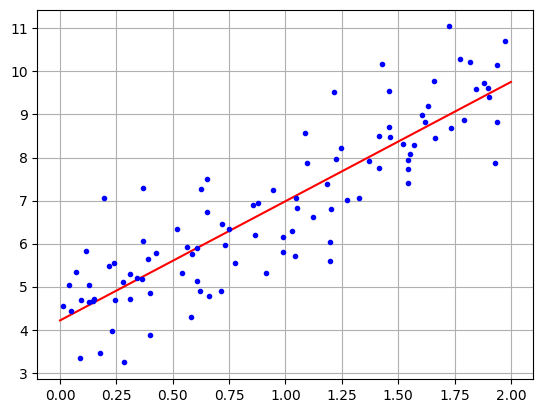

In [6]:
plt.plot(x_new, y_predict, "r-", label="Predictions")
plt.plot(x, y, "b.")
plt.grid(True)
plt.show()

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print("offset, gain (ext.):", lin_reg.intercept_, lin_reg.coef_)
print("predicted endpoints:\n", lin_reg.predict(x_new))

offset, gain (ext.): [4.21509616] [[2.77011339]]
predicted endpoints:
 [[4.21509616]
 [9.75532293]]


In [8]:
iris = load_iris(as_frame=True)
print(list(iris))
print(iris.data.head(3))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2


In [9]:
print(iris.target.head(3))

0    0
1    0
2    0
Name: target, dtype: int64


In [10]:
x = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=SEED)

In [11]:
# train the logistic regression
log_reg = LogisticRegression(random_state=SEED)
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

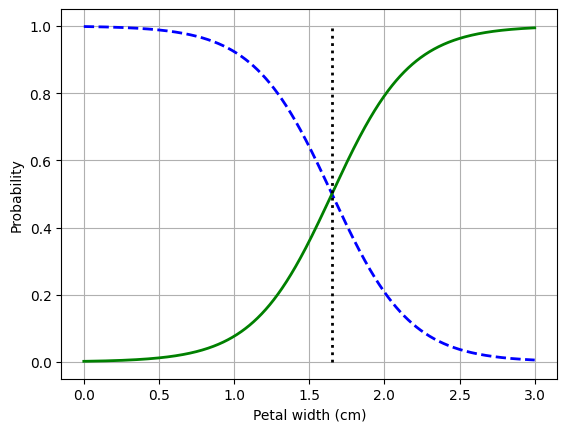

In [12]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(x_new)
decision_boundary = x_new[y_prob[:, 1] >= 0.5][0, 0]

plt.plot(x_new, y_prob[:, 0], "b--", linewidth=2, label="Not Iris virginica prob")
plt.plot(x_new, y_prob[:, 1], "g-", linewidth=2, label = "Iris virginica prob")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

In [14]:
x = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=SEED)

softmax_reg = LogisticRegression(C=30, random_state=SEED)
softmax_reg.fit(x_train, y_train)

In [ ]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]).round(2)